# Stop & Search Analysis

In [1]:
# Importing necessary packages for Stop & Search Analysis
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as stats

In [2]:
#Reading in files from police_data directory to list and concatenating resulting list to a single dataframe: search
search_csv_files = glob.glob('data/police_data' + '/**/' + '*search.csv', recursive=True)

df_search = []
for file in search_csv_files:
    df = pd.read_csv(file)
    df_search.append(df)

db = pd.concat(df_search, ignore_index=True) #Raw Dataframe
search = db.copy() #Dataframe to be processed

In [17]:
#Reading in files from police_data directory to list and concatenating resulting list to a single dataframe: search
search_met_csv_files = glob.glob('data/police_data/metropolitan' + '/**/' + '*search.csv', recursive=True)
search_wm_csv_files = glob.glob('data/police_data/west_midlands' + '/**/' + '*search.csv', recursive=True)
search_ny_csv_files = glob.glob('data/police_data/north_yorkshire' + '/**/' + '*search.csv', recursive=True)

met_search = []
for file in search_met_csv_files:
    df = pd.read_csv(file)
    met_search.append(df)

wm_search = []
for file in search_wm_csv_files:
    df = pd.read_csv(file)
    wm_search.append(df)

met_db =  pd.concat(met_search, ignore_index=True) #Raw Dataframe
met_df = met_db.copy()
wm_db =  pd.concat(wm_search, ignore_index=True) #Raw Dataframe
wm_df = wm_db.copy()

# Cleaning Search

In [4]:
#Cleaning 'Age range' Column
def ages(age_range):
    if pd.isna(age_range):
        return np.nan
    if 'under' in age_range:
        return 9
    if 'over' in age_range:
        return 35
    age_bounds = age_range.split('-')
    return int(age_bounds[0])

search['Age'] = search['Age range'].apply(ages)

In [5]:
#Cleaning 'Date' Column for the purpose of dataframe seperation
def clean_date_column(df, date_column):
    df[date_column] = pd.to_datetime(df[date_column], errors='coerce') 
    df['year'] = df[date_column].dt.year
    df['month'] = df[date_column].dt.month
    df['day'] = df[date_column].dt.day
    df['hour'] = df[date_column].dt.hour
    return df

search = clean_date_column(search, 'Date')

In [6]:
#Removing Null or defunct columns
search = search.drop('Policing operation', axis='columns')
search = search.drop('Part of a policing operation', axis ='columns')
search = search.drop('Age range', axis = 'columns')

In [7]:
#Cleaning Legislation column with sensible codes
search['Legislation'].replace('Misuse of Drugs Act 1971 (section 23)', 'S23', inplace = True)
search['Legislation'].replace('Criminal Justice and Public Order Act 1994 (section 60)', 'S60', inplace = True)
search['Legislation'].replace('Police and Criminal Evidence Act 1984 (section 1)', 'S1', inplace = True)
search['Legislation'].replace('Firearms Act 1968 (section 47)', 'S47', inplace = True)
search['Legislation'].replace('Psychoactive Substances Act 2016 (s36(2))','S36(2)', inplace = True)
search['Legislation'].replace('Deer Act 1991 (section 12)', 'S12', inplace = True)
search['Legislation'].replace('Psychoactive Substances Act 2016 (s37(2))', 'S37(2)', inplace = True)
search['Legislation'].replace('Criminal Justice Act 1988 (section 139B)', 'S139B', inplace = True)
search['Legislation'].replace('Public Stores Act 1875 (section 6)', 'S6', inplace = True)
search['Legislation'].replace('Aviation Security Act 1982 (section 27(1))', 'S27(1)', inplace = True)
search['Legislation'].replace('Customs and Excise Management Act 1979 (section 163)', 'S163', inplace = True)

In [8]:
legis_dict_values = list(db['Legislation'].unique())
legis_dict_keys = list(search['Legislation'].unique())

legis_dict = {}

for a, b in zip(legis_dict_keys, legis_dict_values):
    legis_dict.update({a:b})

# Dataframe Classes

**I have decided to create these dataframes as objects in order to be able to more succintly access chronological data from the overall dataset.
Furthermore, by creating them as objects I will be able to iterate over the class and obtain chronological series of summary statistics for each month.**

In [22]:
class Year:
    
    def __init__(self, df):
        self.df = df

In [23]:
class Month:
    
    def __init__(self, df, month):
        self.df = df
        self.month = month

month_dict = {1.0: 'Jan',
              2.0: 'Feb',
              3.0: 'Mar',
              4.0: 'Apr',
              5.0: 'May',
              6.0: 'Jun',
              7.0: 'Jul',
              8.0: 'Aug',
              9.0: 'Sep',
              10.0: 'Oct',
              11.0: 'Nov',
              12.0: 'Dec'}

### Instantiating Year Objects

In [24]:
search_2021 = Year(search[search['year'] == 2021])
search_2022 = Year(search[search['year'] == 2022])
search_2023 = Year(search[search['year'] == 2023])
search_2024 = Year(search[search['year'] == 2024])

search_years = [search_2021, search_2022, search_2023, search_2024]

### Instantiating Month Objects

In [25]:
search_2021_03 = Month(search_2021.df[search_2021.df['month'] == 3], month_dict[3])
search_2021_04 = Month(search_2021.df[search_2021.df['month'] == 4], month_dict[4])
search_2021_05 = Month(search_2021.df[search_2021.df['month'] == 5], month_dict[5])
search_2021_06 = Month(search_2021.df[search_2021.df['month'] == 6], month_dict[6])
search_2021_07 = Month(search_2021.df[search_2021.df['month'] == 7], month_dict[7])
search_2021_08 = Month(search_2021.df[search_2021.df['month'] == 8], month_dict[8])
search_2021_09 = Month(search_2021.df[search_2021.df['month'] == 9], month_dict[9])
search_2021_10 = Month(search_2021.df[search_2021.df['month'] == 10], month_dict[10])
search_2021_11 = Month(search_2021.df[search_2021.df['month'] == 11], month_dict[11])
search_2021_12 = Month(search_2021.df[search_2021.df['month'] == 12], month_dict[12])

search_2021_months = [search_2021_03, search_2021_04, search_2021_05, search_2021_06, search_2021_07, search_2021_08, search_2021_09, search_2021_10, search_2021_11, search_2021_12]

In [26]:
search_2022_01 = Month(search_2022.df[search_2022.df['month'] == 1], month_dict[1])
search_2022_02 = Month(search_2022.df[search_2022.df['month'] == 2], month_dict[2])
search_2022_03 = Month(search_2022.df[search_2022.df['month'] == 3], month_dict[3])
search_2022_04 = Month(search_2022.df[search_2022.df['month'] == 4], month_dict[4])
search_2022_05 = Month(search_2022.df[search_2022.df['month'] == 5], month_dict[5])
search_2022_06 = Month(search_2022.df[search_2022.df['month'] == 6], month_dict[6])
search_2022_07 = Month(search_2022.df[search_2022.df['month'] == 7], month_dict[7])
search_2022_08 = Month(search_2022.df[search_2022.df['month'] == 8], month_dict[8])
search_2022_09 = Month(search_2022.df[search_2022.df['month'] == 9], month_dict[9])
search_2022_10 = Month(search_2022.df[search_2022.df['month'] == 10], month_dict[10])
search_2022_11 = Month(search_2022.df[search_2022.df['month'] == 11], month_dict[11])
search_2022_12 = Month(search_2022.df[search_2022.df['month'] == 12], month_dict[12])

search_2022_months = [search_2022_01, search_2022_02, search_2022_03, search_2022_04, search_2022_05, search_2022_06, search_2022_07, search_2022_08, search_2022_09, search_2022_10, search_2022_11, search_2022_12]  

In [27]:
search_2023_01 = Month(search_2023.df[search_2023.df['month'] == 1], month_dict[1])
search_2023_02 = Month(search_2023.df[search_2023.df['month'] == 2], month_dict[2])
search_2023_03 = Month(search_2023.df[search_2023.df['month'] == 3], month_dict[3])
search_2023_04 = Month(search_2023.df[search_2023.df['month'] == 4], month_dict[4])
search_2023_05 = Month(search_2023.df[search_2023.df['month'] == 5], month_dict[5])
search_2023_06 = Month(search_2023.df[search_2023.df['month'] == 6], month_dict[6])
search_2023_07 = Month(search_2023.df[search_2023.df['month'] == 7], month_dict[7])
search_2023_08 = Month(search_2023.df[search_2023.df['month'] == 8], month_dict[8])
search_2023_09 = Month(search_2023.df[search_2023.df['month'] == 9], month_dict[9])
search_2023_10 = Month(search_2023.df[search_2023.df['month'] == 10], month_dict[10])
search_2023_11 = Month(search_2023.df[search_2023.df['month'] == 11], month_dict[11])
search_2023_12 = Month(search_2023.df[search_2023.df['month'] == 12], month_dict[12])

search_2023_months = [search_2023_01, search_2023_02, search_2023_03, search_2023_04, search_2023_05, search_2023_06, search_2023_07, search_2023_08, search_2023_09, search_2023_10, search_2023_11, search_2023_12]

In [28]:
search_2024_01 = Month(search_2024.df[search_2024.df['month'] == 1], month_dict[1])
search_2024_02 = Month(search_2024.df[search_2024.df['month'] == 2], month_dict[2])
search_2024_03 = Month(search_2024.df[search_2024.df['month'] == 3], month_dict[3])

search_2024_months = [search_2024_01, search_2024_02, search_2024_03]

In [29]:
search_2021.monthdfs = search_2021_months
search_2022.monthdfs = search_2022_months
search_2023.monthdfs = search_2023_months
search_2024.monthdfs = search_2024_months

# Plotting Graphs

Legislation
S23       0.602289
S1        0.378428
S47       0.009993
S60       0.008402
S36(2)    0.000644
S37(2)    0.000187
S139B     0.000038
S163      0.000009
S27(1)    0.000005
S6        0.000003
S12       0.000002
Name: proportion, dtype: float64


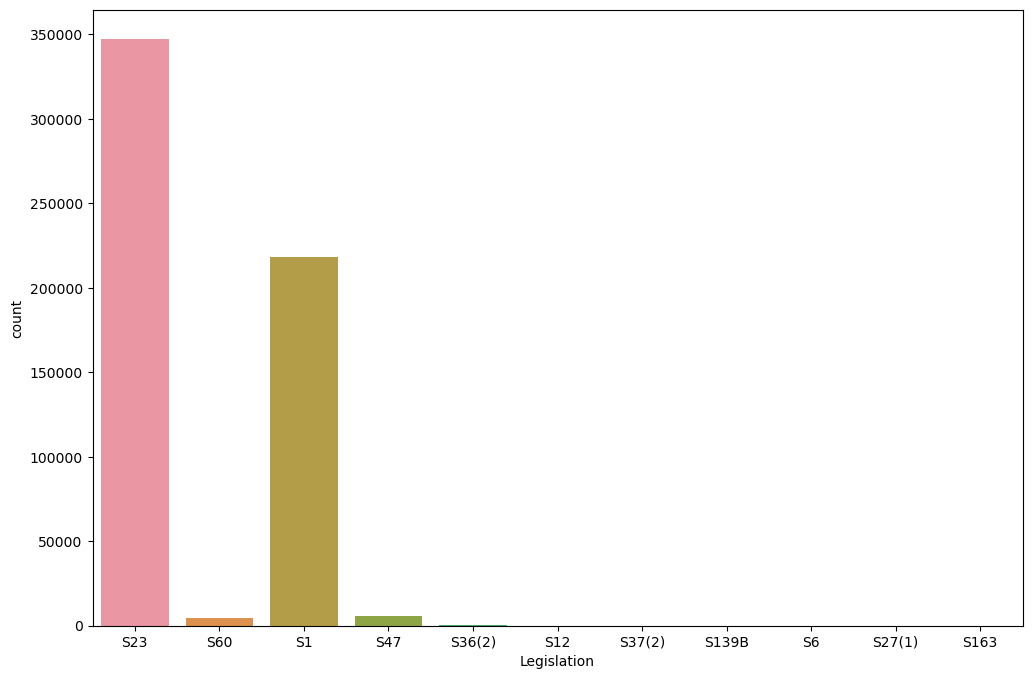

In [40]:
#Datalists for search['Legislation'] dataframe
print(search['Legislation'].value_counts(normalize = True))
ax0 = plt.figure(figsize = (12,8))
ax0 = sns.countplot(x = 'Legislation', data = search)
plt.show()

Age
18.0    159659
25.0    117005
35.0    111697
10.0     90590
9.0        149
Name: count, dtype: int64


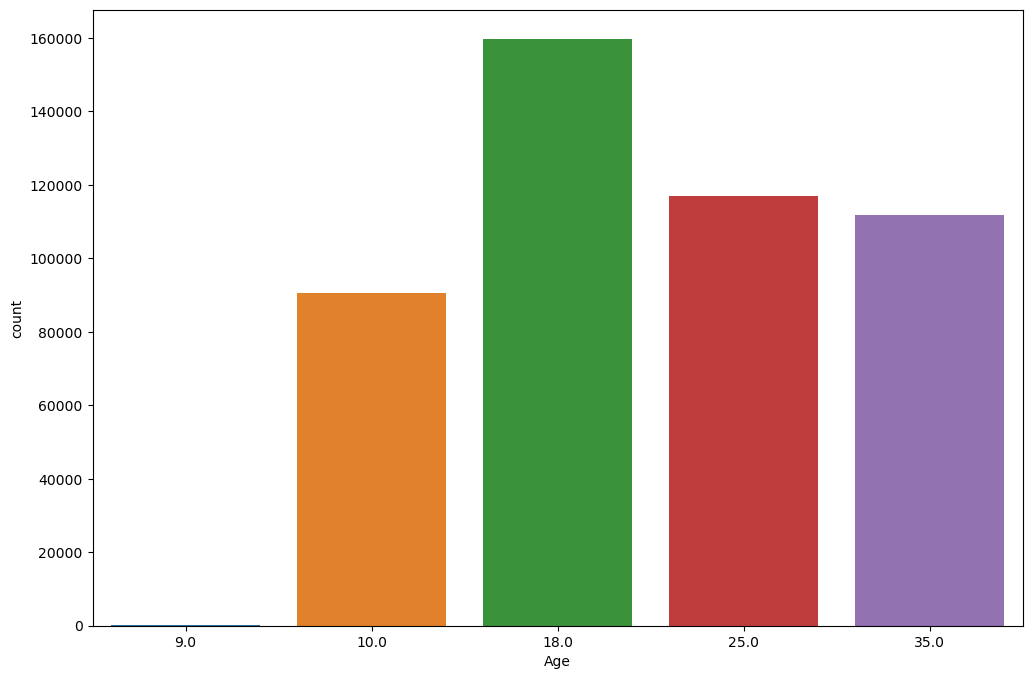

In [41]:
print(search['Age'].value_counts())

ax1 = plt.figure(figsize = (12,8))
ax1 = sns.countplot(x='Age', data = search)
plt.show()

Officer-defined ethnicity
White    227576
Black    193980
Asian     95442
Other     25945
Name: count, dtype: int64


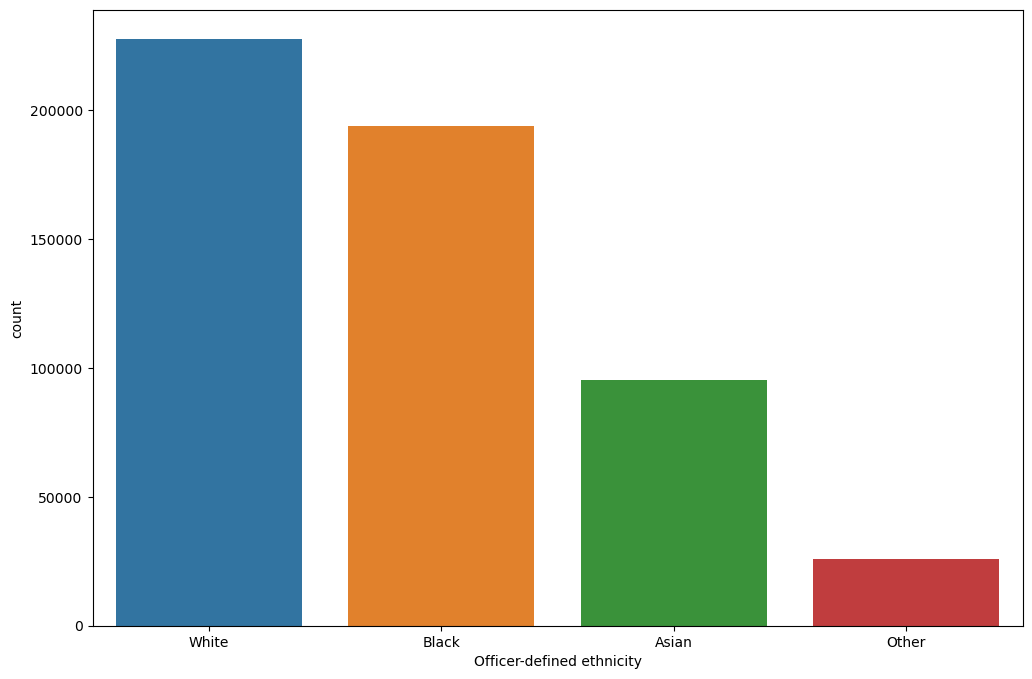

In [43]:
print(search['Officer-defined ethnicity'].value_counts())

ax2 = plt.figure(figsize = (12,8))
ax2 = sns.countplot(x = 'Officer-defined ethnicity', data = search)
plt.show()

Type
Person search                448013
Person and Vehicle search    112744
Vehicle search                15795
Name: count, dtype: int64


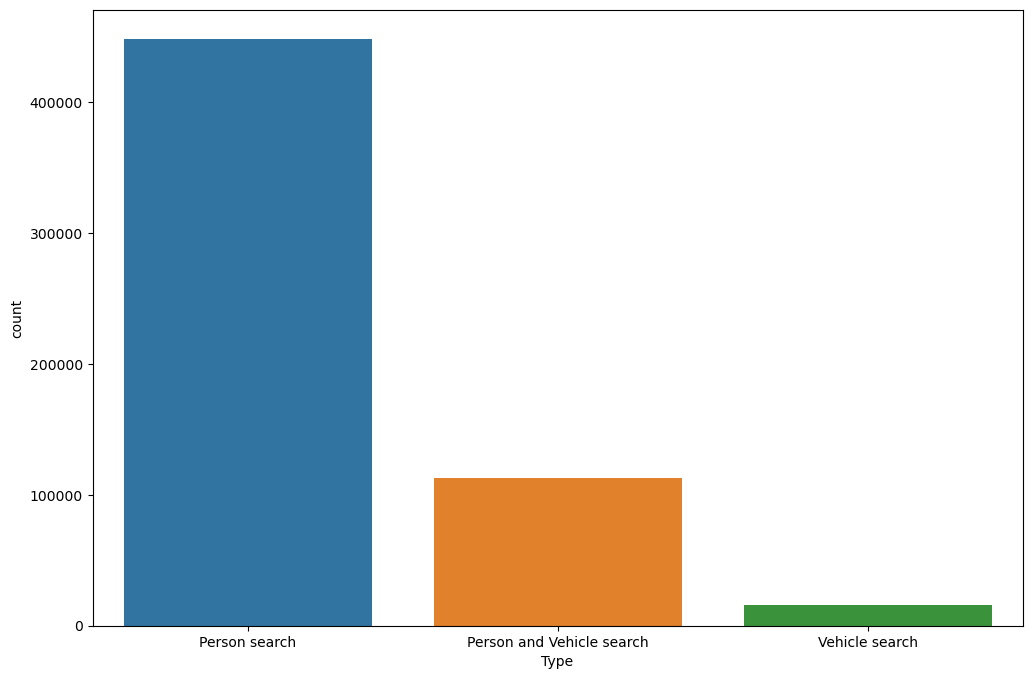

In [44]:
print(search['Type'].value_counts())

ax3 = plt.figure(figsize = (12,8))
ax3 = sns.countplot(x = 'Type', data = search)
plt.show()

Outcome
A no further action disposal       410538
Arrest                              81250
Community resolution                51843
Penalty Notice for Disorder         15619
Summons / charged by post            7735
Khat or Cannabis warning              912
Caution (simple or conditional)       765
Name: count, dtype: int64


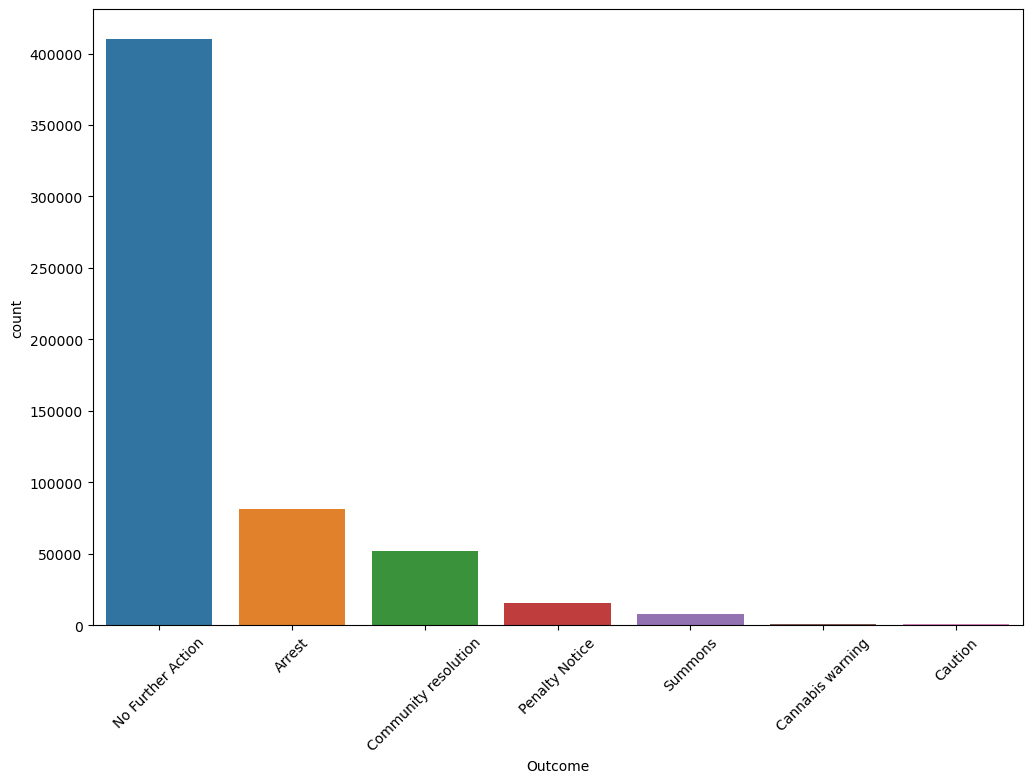

In [47]:
print(search['Outcome'].value_counts())

ax4 = plt.figure(figsize = (12,8))
ax4 = sns.countplot(x = 'Outcome', data = search)
ax4.set_xticklabels(['No Further Action', 'Arrest','Community resolution', 'Penalty Notice', 'Summons', 'Cannabis warning', 'Caution'], rotation = 45)
plt.show()

# Raw and Processed Dataframes

In [ ]:
db

In [ ]:
search

# Working on rest of code